In [1]:
import os
import shutil

import pandas as pd
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
import keras

from keras import Input
from keras.layers import TextVectorization
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import (
    GRU,
    Conv1D,
    Dense,
    Embedding,
    Flatten,
    Lambda,
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

print(tf.__version__)

2023-02-14 13:56:16.103715: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 13:56:16.996438: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-02-14 13:56:16.996554: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

2.11.0


In [2]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

2023-02-14 13:56:19.791212: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 13:56:19.804436: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 13:56:19.806239: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-14 13:56:19.808752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [14]:
embed(["this is a test"])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 7.16429495e-04, -6.12083860e-02,  3.54019832e-03,
         1.99742932e-02,  1.44780576e-02, -4.65770140e-02,
         1.94870867e-02,  1.84866004e-02,  4.83568460e-02,
         5.58712706e-02,  3.50477323e-02, -3.42288502e-02,
         1.06411673e-01, -6.08323421e-03, -2.08509490e-02,
         1.94257144e-02, -3.24879289e-02,  4.48978245e-02,
         7.74368718e-02, -6.94912151e-02,  1.26573769e-03,
         3.50133292e-02, -6.05651028e-02, -1.98424142e-02,
        -4.96499836e-02, -3.44647951e-02, -2.25433316e-02,
        -4.85629663e-02,  2.53873188e-02, -4.38896790e-02,
         5.61766662e-02, -5.80912903e-02,  4.17975932e-02,
         3.13192816e-03,  9.74121410e-03,  1.15032298e-02,
        -4.31222878e-02, -4.96615060e-02,  4.41219024e-02,
         7.04900473e-02,  5.30350488e-03, -2.31543016e-02,
        -1.23741413e-02,  1.56459603e-02,  4.82196733e-03,
        -3.33048254e-02, -5.13672195e-02, -3.63756604e-02,
      

In [3]:
#read data
data = pd.read_csv("../data/train.csv")
#shuffle data
data = data.sample(frac=1)

In [48]:
BATCHSIZE = 50

inputs = Input(shape=(512,),dtype=tf.float32,name="embeddedInputString")
# x = Lambda(lambda x:tf.reduce_mean(x,axis=1))(inputs)
x = Dense(256,activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.005))(inputs)
x = tf.keras.layers.Dropout(0.2)(x)
# x = GRU(16)(inputs)
# x = inputs
outputs = Dense(1,activation="sigmoid")(x)

model = keras.Model(inputs=inputs,outputs=outputs,name="modeltest")
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss="binary_crossentropy",metrics=["Accuracy"])

Model: "modeltest"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embeddedInputString (InputL  [(None, 512)]            0         
 ayer)                                                           
                                                                 
 dense_27 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_28 (Dense)            (None, 1)                 257       
                                                                 
Total params: 131,585
Trainable params: 131,585
Non-trainable params: 0
_________________________________________________________________


In [49]:
modelhistory = model.fit(
    embed(data.text),
    data.target, 
    epochs=50,
    batch_size=BATCHSIZE, 
    validation_split=0.2
    # validation_data=(data.text[6000:],target[6000:]),
    # callbacks=[EarlyStopping(patience=10)]
)

Epoch 1/50
122/122 [==============================] - 2s 5ms/step - loss: 0.9757 - Accuracy: 0.7759 - val_loss: 0.5205 - val_Accuracy: 0.8122
Epoch 2/50
122/122 [==============================] - 0s 4ms/step - loss: 0.5055 - Accuracy: 0.8082 - val_loss: 0.4839 - val_Accuracy: 0.8122
Epoch 3/50
122/122 [==============================] - 0s 3ms/step - loss: 0.4913 - Accuracy: 0.8041 - val_loss: 0.4874 - val_Accuracy: 0.7938
Epoch 4/50
122/122 [==============================] - 0s 3ms/step - loss: 0.4877 - Accuracy: 0.8108 - val_loss: 0.4719 - val_Accuracy: 0.8070
Epoch 5/50
122/122 [==============================] - 0s 3ms/step - loss: 0.4832 - Accuracy: 0.8084 - val_loss: 0.4735 - val_Accuracy: 0.8050
Epoch 6/50
122/122 [==============================] - 0s 3ms/step - loss: 0.4813 - Accuracy: 0.8094 - val_loss: 0.4661 - val_Accuracy: 0.8135
Epoch 7/50
122/122 [==============================] - 0s 4ms/step - loss: 0.4777 - Accuracy: 0.8103 - val_loss: 0.4620 - val_Accuracy: 0.8188
Epoch 

<AxesSubplot:title={'center':'BS=50 | USE | 256 dense'}>

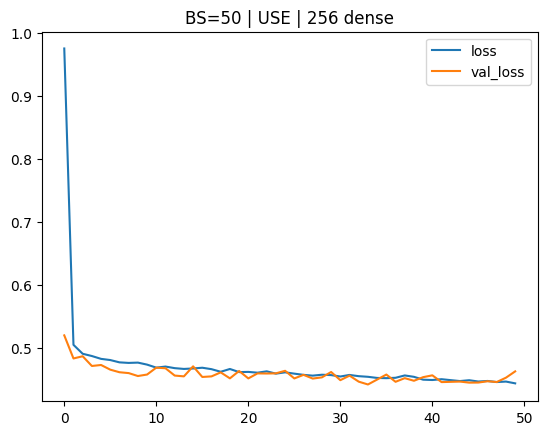

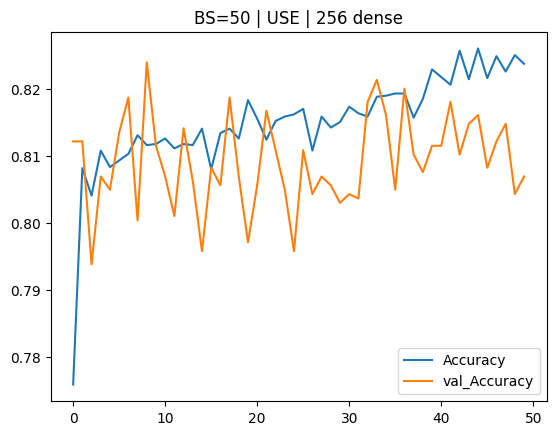

In [50]:
pd.DataFrame(modelhistory.history)[["loss","val_loss"]].plot(title="BS="+ str(BATCHSIZE) +" | USE | 256 dense")
pd.DataFrame(modelhistory.history)[["Accuracy","val_Accuracy"]].plot(title="BS="+ str(BATCHSIZE) +" | USE | 256 dense")